In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

files = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_dir = os.path.join(dirname, filename)
        files.append(file_dir)
        print(f"{os.path.join(dirname, filename)} added to files array")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data5g/Theme5/data/2022-07-08-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-07-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-21-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-14-garbo06-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-15-garbo08-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-20-garbo05-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-08-garbo10-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-22-garbo01-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-14-garbo11-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-12-garbo01-combined-kml.csv added to files array
/kaggle/input/data5g/Theme5/data/2022-07-06-garbo10-combined-kml.csv added to files array
/kaggle/in

In [2]:
print(len(files))

136


In [3]:
#Data Ingestion & Cleaning
#Filter out Invalid GPS Points & Parse timestamps
import warnings
warnings.filterwarnings('ignore') #remove warnings

cleaned_dataframes = []

for file in files:
    data5G = pd.read_csv(file) #Read csv file 
    #GPS Points 
    data5G = data5G[
    (data5G['latitude'].between(-90, 90)) & #North-South Range -90,+90
    (data5G['longitude'].between(-180, 180)) & #East-West Range -180,+180
    (data5G['latitude'] != 99999) &
    (data5G['longitude'] != 99999)
    ]  
    #Parse timestamps 
    data5G['time'] = pd.to_datetime(data5G['time'], unit='s', errors='coerce') #Removes invalid values (abc) and converts numeric values into time and date
    data5G = data5G.dropna(subset=['time']) #Removes rows with invalid timestamps

    cleaned_dataframes.append(data5G)

master_data5G = pd.concat(cleaned_dataframes, ignore_index=True)

master_data5G.to_csv('/kaggle/working/master_data5G.csv', index=False) #Convert to a master csv 

print("Data cleaning completed and saved as'master_data5G.csv'")

    
    

Data cleaning completed and saved as'master_data5G.csv'


In [4]:
#Data Pre-Processing
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/working/master_data5G.csv', low_memory=False) #Read new CSV created


df.head() #Show the first 5 rows


,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,Retransmissions,CWnd,cwnd_unit,Role-RX,Transfer size-RX,Transfer unit-RX,Bitrate-RX,bitrate_unit-RX,send_data,square_id
0,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768
1,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768
2,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768
3,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768
4,2022-07-07 19:36:08,Fri,2022.0,7.0,8.0,5.0,36.0,8.0,AEST,-37.712508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,square_111669149768


In [5]:
# Data structure & types
df.info()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493820 entries, 0 to 2493819
Data columns (total 32 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   Day               object 
 2   Year              float64
 3   Month             float64
 4   Date              float64
 5   hour              float64
 6   min               float64
 7   sec               float64
 8   timezone          object 
 9   latitude          float64
 10  longitude         float64
 11  speed             float64
 12  truck             object 
 13  svr1              float64
 14  svr2              float64
 15  svr3              float64
 16  svr4              float64
 17  Role              object 
 18  Transfer size     float64
 19  Transfer unit     object 
 20  Bitrate           float64
 21  bitrate_unit      object 
 22  Retransmissions   object 
 23  CWnd              object 
 24  cwnd_unit         object 
 25  Role-RX           object 
 26  Transfer size-

,time,Day,Year,Month,Date,hour,min,sec,timezone,latitude,...,Retransmissions,CWnd,cwnd_unit,Role-RX,Transfer size-RX,Transfer unit-RX,Bitrate-RX,bitrate_unit-RX,send_data,square_id
count,2493820,2493820,2493820.0,2493820.0,2.493820e+06,2.493820e+06,2.493820e+06,2.493820e+06,2493820,2.493820e+06,...,2415256,2415254,2416777,2416752,2.416751e+06,2416753,2.416751e+06,2416753,2.263310e+06,2481677
unique,469342,5,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,695,695,1,3,NaN,1,NaN,1,NaN,298
top,2022-07-04 01:16:51,Mon,NaN,NaN,NaN,NaN,NaN,NaN,AEST,NaN,...,0.0,0.01025390625,MBytes,RX-C,NaN,MBytes,NaN,Mbits/sec,NaN,square_111669149768
freq,28,546142,NaN,NaN,NaN,NaN,NaN,NaN,2493820,NaN,...,1744567,899601,2416777,2415229,NaN,2416753,NaN,2416753,NaN,82225
mean,NaN,NaN,2022.0,7.0,1.219823e+01,8.831085e+00,2.942074e+01,2.949162e+01,NaN,-3.775414e+01,...,NaN,NaN,NaN,NaN,1.971077e+00,NaN,1.653276e+01,NaN,3.077501e-01,NaN
std,NaN,NaN,0.0,0.0,6.012849e+00,2.218901e+00,1.750480e+01,1.731369e+01,NaN,3.392902e-02,...,NaN,NaN,NaN,NaN,1.914520e+00,NaN,1.594400e+01,NaN,9.148516e-01,NaN
min,NaN,NaN,2022.0,7.0,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,NaN,-3.782882e+01,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,NaN,2022.0,7.0,6.000000e+00,7.000000e+00,1.400000e+01,1.400000e+01,NaN,-3.778264e+01,...,NaN,NaN,NaN,NaN,7.382812e-01,NaN,6.190000e+00,NaN,0.000000e+00,NaN
50%,NaN,NaN,2022.0,7.0,1.200000e+01,9.000000e+00,2.900000e+01,2.900000e+01,NaN,-3.775611e+01,...,NaN,NaN,NaN,NaN,1.460000e+00,NaN,1.220000e+01,NaN,6.358099e-02,NaN
75%,NaN,NaN,2022.0,7.0,1.800000e+01,1.100000e+01,4.500000e+01,4.400000e+01,NaN,-3.772892e+01,...,NaN,NaN,NaN,NaN,2.870000e+00,NaN,2.410000e+01,NaN,2.814837e-01,NaN


time                     0
Day                      0
Year                     0
Month                    0
Date                     0
hour                     0
min                      0
sec                      0
timezone                 0
latitude                 0
longitude                0
speed                    1
truck                    3
svr1                336023
svr2                336023
svr3                336023
svr4                336024
Role                 77043
Transfer size        77044
Transfer unit        77043
Bitrate              77044
bitrate_unit         77043
Retransmissions      78564
CWnd                 78566
cwnd_unit            77043
Role-RX              77068
Transfer size-RX     77069
Transfer unit-RX     77067
Bitrate-RX           77069
bitrate_unit-RX      77067
send_data           230510
square_id            12143
dtype: int64


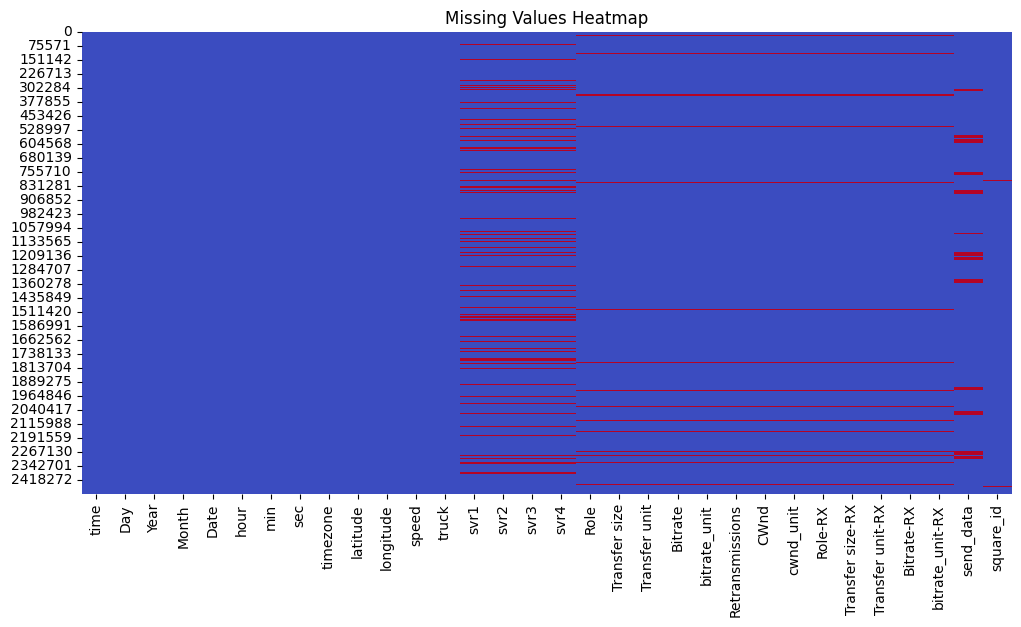

In [6]:
#Total missing values per column
print(df.isnull().sum())

#Visual heatmap of missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm") #Red = Missing, Blue = Present
plt.title("Missing Values Heatmap")
plt.show()


In [7]:
#Missing-Value Strategy 
#Check missing values
df = pd.read_csv('/kaggle/working/master_data5G.csv')  
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

#Drop columns with >60% missing values
threshold = 60
drop_cols = missing_percent[missing_percent > threshold].index
df = df.drop(columns=drop_cols)

print("Dropped columns (>{}%) due to missing data:".format(threshold))
print(drop_cols.tolist())


Dropped columns (>60%) due to missing data:
[]


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/kaggle/working/master_data5G.csv')  


numeric_df = df.select_dtypes(include=['number'])

#Define function for removing outliers using IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    #Define outliers as data points outside the range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Filter the data
    df_cleaned = df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]
    
    return df_cleaned

#Outlier removal 
df_cleaned = remove_outliers_iqr(numeric_df, numeric_df.columns)

#Check shape before and after cleaning
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")





Shape before removing outliers: (2493820, 32)
Shape after removing outliers: (2493820, 18)


In [19]:

#Pairplot for multivariate analysis
sns.pairplot(df_cleaned, diag_kind='kde', corner=True)

#Correlation matrix
corr = abs(df_cleaned.corr())

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x782855b75080> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x782855de2ca0> (for post_execute):


KeyboardInterrupt: 

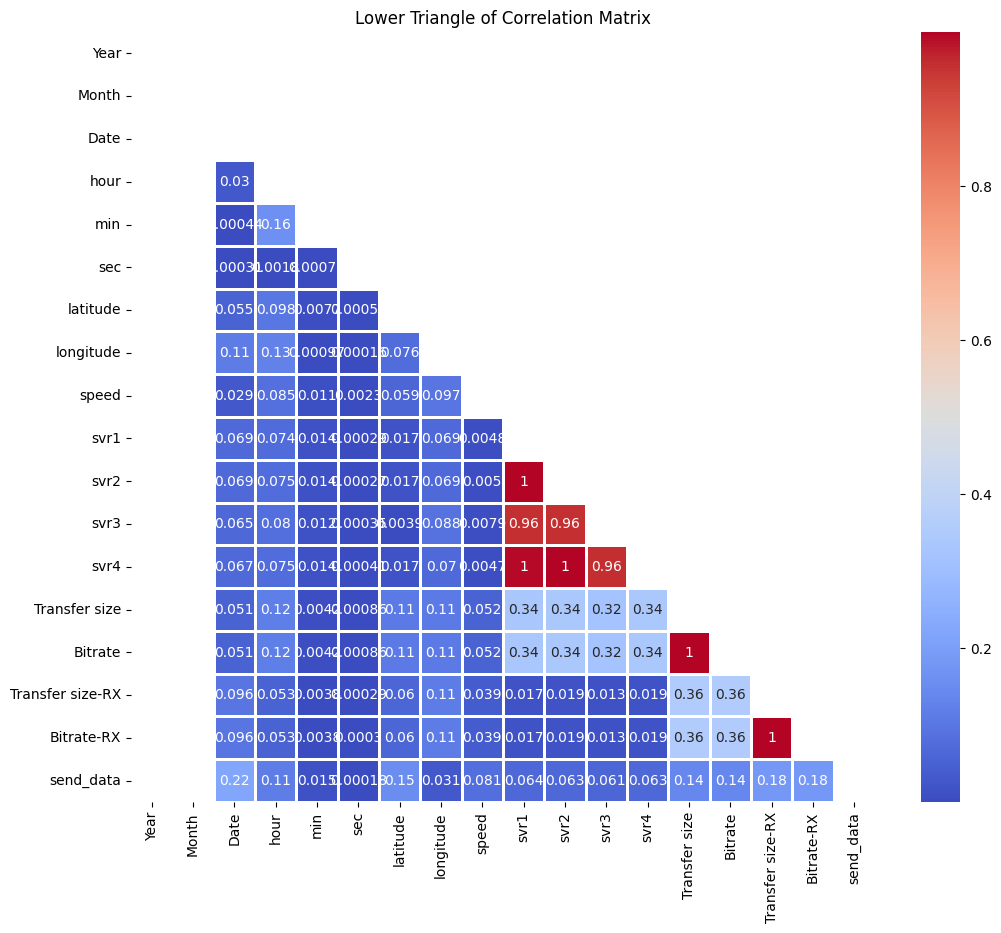

In [13]:
#Lower triangle mask
lower_triangle = np.tril(corr, k=-1)
mask = lower_triangle == 0

#Heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(lower_triangle, center=0.5, cmap='coolwarm', annot=True,
            xticklabels=corr.index, yticklabels=corr.columns,
            cbar=True, linewidths=1, mask=mask)
plt.title('Lower Triangle of Correlation Matrix')
plt.show()


In [20]:
#Composite Features
df['upload_speed'] = df['send_data'] / df['Transfer size'] #By dividing measures efficiency of the data sent
df['total_bitrate'] = df['Bitrate'] + df['Bitrate-RX'] #Total bandwidth usage
df['total_transfer_size'] = df['Transfer size'] + df['Transfer size-RX'] #Total data transferred - Assess the network performance impact
df['latency_avg'] = df[['svr1', 'svr2', 'svr3', 'svr4']].mean(axis=1) #Average network latency
df['latency_std'] = df[['svr1', 'svr2', 'svr3', 'svr4']].std(axis=1) #standard dev. - High variability indicates unstable connections 
df['time_in_seconds'] = df['hour'] * 3600 + df['min'] * 60 + df['sec']

#Drop the correlated features 
df = df.drop(columns=[
    'Bitrate', 'Bitrate-RX', 
    'Transfer size', 'Transfer size-RX', 
    'svr1', 'svr2', 'svr3', 'svr4'
])



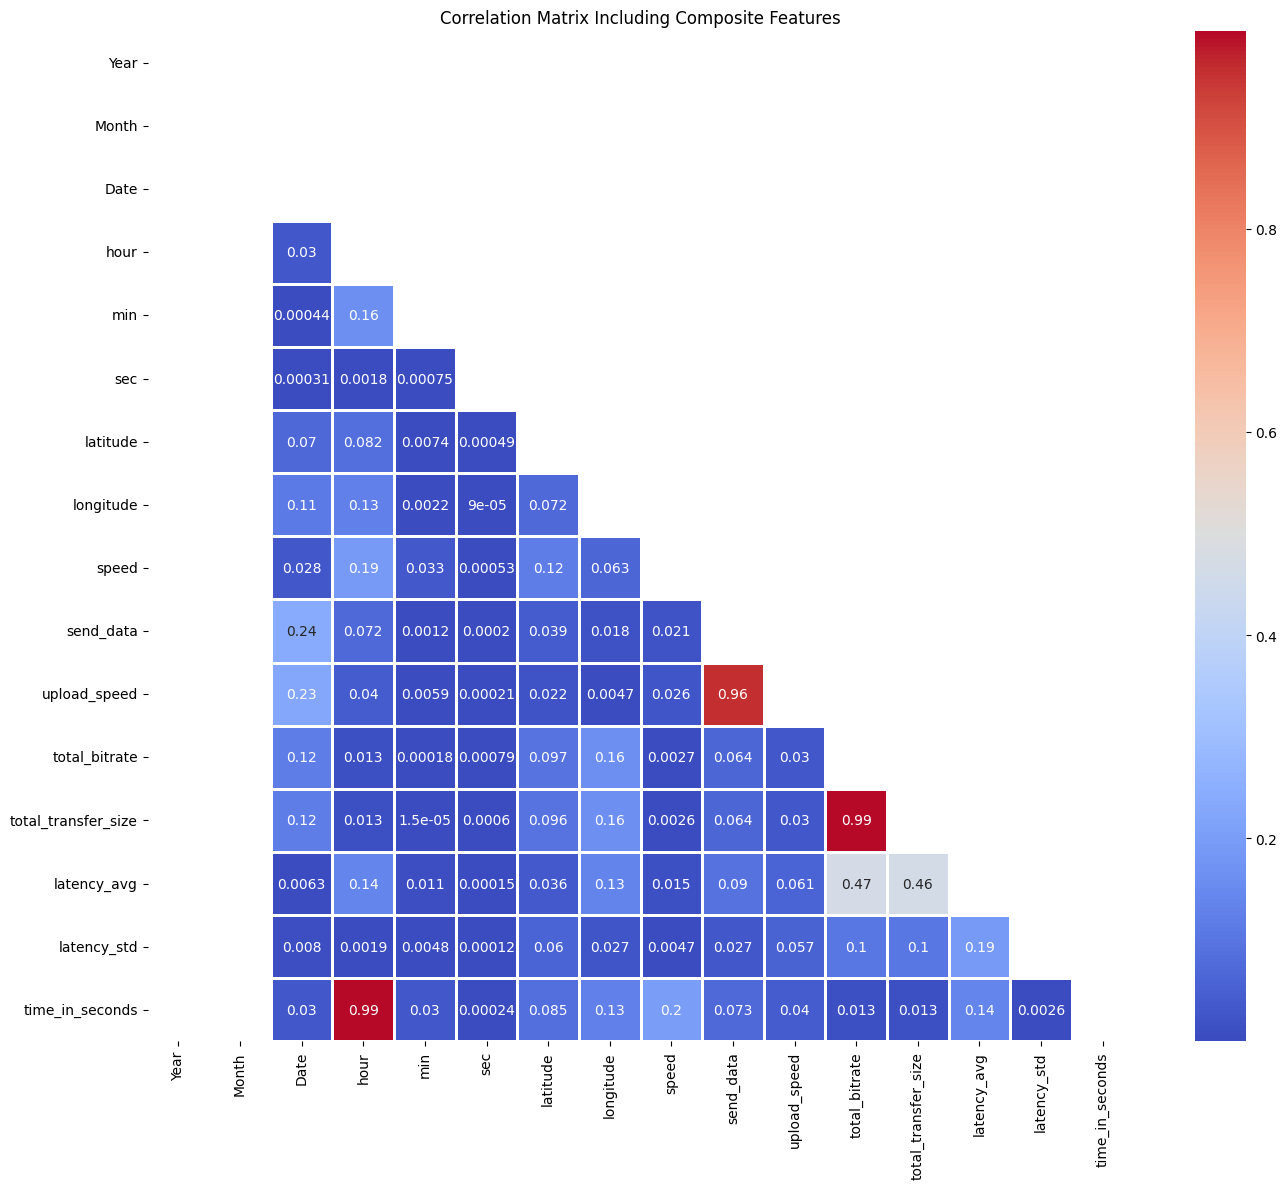

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr().abs()

#Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, mask=mask, center=0.5, cmap='coolwarm', annot=True,
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar=True, linewidths=1)
plt.title('Correlation Matrix Including Composite Features')
plt.tight_layout()
plt.show()
